1.1 Define a problem
- define an image classification problem to help people recycle waste by returning a prediction of whether an item is recyclable or not (12 classes)
- describe inputs, outputs and target classes

Problem Definition:
The problem we aim to solve is the mis-classification and contamination of recyclable waste by individuals due to a lack of understanding of their local council's recycling guidelines. This mismanagement often leads to "wish recycling," where people recycle items they believe should be recyclable, even if they're not accepted by local recycling programs.

Solution:
To solve this problem, we propose developing a deep learning model for image classification, specifically designed to identify different types of waste materials. This application will assist users in correctly sorting their waste into recyclable and non-recyclable categories, according to the recycling guidelines of my local council in Sydney, NSW.

Inputs:
The input to the model would be images of the waste item that the user plans to discard.

Outputs:
The output of the model will be a classification of the waste item as either recyclable or non-recyclable, along with a confidence score for the prediction. The confidence score will be used to determine whether the item should be recycled or not. If the confidence score is above a certain threshold, the item will be classified as recyclable, and the user will be advised to recycle it. If the confidence score is below the threshold, the item will be classified as non-recyclable, and the user will be advised to dispose of it in the general waste bin.
We will use the following classes for our classification model:
Battery, Biological, Brown Glass, Cardboard, Clothes, Green Glass, Metal, Paper, Plastic, Shoes, Trash, White Glass (12 total classes)

1.2 Make a plan
- describe the data you will use to train, validate and test your model
- how many images do you need?
- how will you label your data?
- how will you evaluate your model?

Dataset: TrashNet, ISLR, DAWSE and RecycleNet
TrashNet: This is a publicly available dataset of 2,500 images of trash items that have been labeled as recyclable or non-recyclable. The images were collected from the web and tagged using Google Cloud Vision API. Dataset link: https://github.com/garythung/trashnet.

ISLR Recycling Image Dataset: This dataset contains over 1,000 images of recyclable and non-recyclable materials, captured under various conditions such as different lighting, angles, and backgrounds. Dataset link: http://cs.haverford.edu/faculty/smathieson/teaching/f19/labs/recycling/.

Densely Annotated Waste Scenes (DAWSE): This is a dataset that consists of images of household waste scenes along with their corresponding annotations. The dataset contains over 10,000 images of household garbage and recycling bins, and each image has been densely annotated with object labels. Dataset link: https://www.aicrowd.com/challenges/densely-annotated-waste-scenes-dawse.

RecycleNet: This dataset contains over 25,000 images of recyclable and non-recyclable products that have been labeled by crowdsourcing. The dataset also includes information on the probability of correct classification for each image. Dataset link: https://sites.google.com/view/recyclenet/home.

Number of images:
In general, deep learning models perform better with a larger number of training images. However, the number of images required depends on the complexity of the problem and the number of classes. For example, a model that classifies images into two classes (e.g., recyclable and non-recyclable) will require fewer images than a model that classifies images into eight classes (e.g., paper, cardboard, glass, plastic, metal, compost, electronic waste, and non-recyclable waste). In this case we can use data augmentation to increase the number of images in our dataset by applying transformations such as rotation, translation, scaling, etc. to the original images. This will allow us to train a more robust model with fewer images.

Labeling:
In machine learning tasks such as image classification, having labeled data is crucial to training accurate models. The labeling process involves assigning a class label to each image in the dataset based on its contents. The class label could be binary (recyclable/non-recyclable) or multi-class (paper, plastic, metal, glass, etc.). The TrashNet dataset is already labeled, so we can use it as is. However, the some other datasets may not be labeled, so we will need to label them ourselves. We can do this by manually labeling the images individually or by using a crowd sourcing platform such as Amazon Mechanical Turk.

Model evaluation:
As I build and train my CNN model, I'm going to use several metrics to evaluate its performance:

Accuracy: This gives me the ratio of correctly predicted observations to the total observations. It's simple and intuitive, but not always the best choice if my classes are imbalanced.

Precision and Recall: These tell me about the model's exactness and completeness. They're especially useful if one type of error is more important to avoid than another.

F1-Score: This is the weighted average of Precision and Recall.

AUC-ROC: This tells me how well the model can distinguish between classes. A higher AUC is better.

Loss: During training, I want to minimize the model's loss. By tracking loss on a validation set, I can estimate how well my model will do on unseen data.

Once the model is trained, I'll use it in real-time image classification. When a user uploads an image, I preprocess the image and feed it into the model. The model outputs probabilities for each class, and I'll use these to make a prediction.

I'll also consider the model's confidence in its prediction. If the highest probability is much larger than the second-highest, the model is more confident. Alternatively, I might set a threshold below which the model indicates it's unsure.

Throughout this process, I'll need to keep an eye on how the model performs in real-world scenarios, and be ready to adjust and improve it based on feedback.

Other ways to assess if the model is "good enough":
-> Comparing the model's performance to a baseline model
-> Cross-validation which involves splitting the data into training and test sets, training the model on the training set, and evaluating the model on the test set. This will provide a more robust estimate of the model's performance than a single train/test split.
-> Using a confusion matrix to visualize the model's performance. This will show the number of correct and incorrect predictions for each class and give more detail.
-> Sensitivity analysis: In some applications, different types of errors have different costs. For example, in medical diagnostics, a false negative might be much worse than a false positive. In these cases, you can assign costs to different types of errors and evaluate the model based on the total cost.

1.3 Implementation
- collect data
- develop an initial model (before we fine tune it and find ways to enhance it)
- evaluate the model

Collecting data and developing an initial model

In [5]:
# Import the dataset called "garbage_classification_enhanced" which has 12 classes with images inside each of the folders.
import os
import glob

from PIL import Image

path = 'garbage_classification_enhanced'

# Collect all images from subdirectories
image_paths = glob.glob(os.path.join(path, "*", "*.jpg"))

# Load images and their labels
images = []
labels = []

for image_path in image_paths:
    img = Image.open(image_path)
    images.append(img.copy())  # Copy the image object into memory
    img.close()  # Close the opened file
    label = os.path.basename(os.path.dirname(image_path))
    labels.append(label)

In [6]:
# Check the number of images loaded
print("Number of images loaded: %d" % len(images))

Number of images loaded: 15869


In [7]:
# check the number of classes
print("Number of classes: %d" % len(set(labels)))

Number of classes: 12


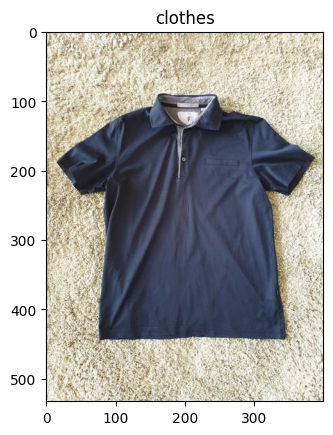

In [8]:
# print a random image and its label
import random
import matplotlib.pyplot as plt

index = random.randint(0, len(images))
plt.imshow(images[index])
plt.title(labels[index])
plt.show()

In [9]:
# I have 12 classes/labels with a dataset of 15870 images. Now I will develop a basic deep learning model to classify the images so we have something to compare our improved model to later.

In [10]:
# i won't use architectures like VGG16, ResNet, etc... YET as I want a barebones model to begin with. I also won't use transfer learning or data augmentation but will add these later to see how they improve the model.

In [11]:
# split the dataset into training and test sets
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42) # stratify the labels to ensure equal distribution of classes in the training and test sets (i.e. 20% of each class in the training set and 20% in the test set) and set a random state for reproducibility

Stratification is the process of dividing samples proportionately based on their classes (or labels) while splitting the dataset. Stratifying the split is important in classification problems for the following reasons:

Balanced class distribution: Stratification ensures that both training and testing sets have a similar distribution of classes, which represents the overall dataset adequately. This helps in maintaining the class balance between the two splits, preventing any imbalance caused by random sampling.

Avoid rare class under-representation: In cases where some classes have very few samples, stratification helps to avoid situations where a rare class might not be represented in one of the splits. This leads to more robust evaluation and learning of rare classes.

Better model performance: Models trained on stratified datasets generally generalize better to new data since they learn from a balanced representation of all classes, reducing the chance of overfitting to specific classes.

Improved evaluation metrics: Stratification helps in getting more reliable evaluation metrics, as the testing set has a similar class distribution as the training set. This ensures that the model's performance can be evaluated fairly across all classes.

In summary, stratifying the dataset split ensures that your model is trained and evaluated on a representative sample of all classes, ultimately leading to better performance and more accurate metrics.

In [12]:
# check the number of images in the training and test sets
print("Number of images in the training set: %d" % len(X_train))
print("Number of images in the test set: %d" % len(X_test))

Number of images in the training set: 12695
Number of images in the test set: 3174


In [13]:
# now that we have our training and test sets, we need to preprocess the images so that they are in a format that the model can understand. This involves resizing the images to a fixed size, converting them to arrays, and normalizing the pixel values to be between 0 and 1.

# resize the images to a fixed size (common ones include 150x150, 224x224 and 299,299). It's important to use a size that retains enough information for the model to learn from, but isn't so large that it slows down training. I'll use 150x150 here to begin with and can always adjust later.

target_size = (150, 150) # set the target size for resizing the images

In [14]:
from PIL import Image

# Function to ensure all images are RGB
def ensure_rgb(img):
    if img.mode != 'RGB':
        return img.convert('RGB')
    return img

In [15]:
# convert images to arrays and then resize them to the target size
import numpy as np
from PIL import ImageOps
from keras.preprocessing.image import image_utils
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


# convert images to arrays and resize them to the target size
X_train = [image_utils.img_to_array(ImageOps.fit(ensure_rgb(img), target_size)) for img in X_train]
X_test = [image_utils.img_to_array(ImageOps.fit(ensure_rgb(img), target_size)) for img in X_test]

In [16]:
# convert the image arrays to NumPy arrays and normalize the pixel values to be between 0 and 1
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [17]:
# convert the labels to numeric values and one-hot encode them
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [18]:
y_train = to_categorical(y_train, 12)
y_test = to_categorical(y_test, 12)

In [19]:
# check the shape of the training and test sets
print("Shape of training set: %s" % str(X_train.shape))
print("Shape of test set: %s" % str(X_test.shape))

Shape of training set: (12695, 150, 150, 3)
Shape of test set: (3174, 150, 150, 3)


In [20]:
# check the shape of the labels
print("Shape of training labels: %s" % str(y_train.shape))
print("Shape of test labels: %s" % str(y_test.shape))

Shape of training labels: (12695, 12)
Shape of test labels: (3174, 12)


In [21]:
# check the range of the pixel values
print("Range of pixel values: %.2f to %.2f" % (X_train.min(), X_train.max()))

Range of pixel values: 0.00 to 1.00


In [22]:
# check the labels
print("Labels: %s" % str(le.classes_))

Labels: ['battery' 'biological' 'brown-glass' 'cardboard' 'clothes' 'green-glass'
 'metal' 'paper' 'plastic' 'shoes' 'trash' 'white-glass']


In [23]:
# check the label encoding
print("Label encoding: %s" % str(le.transform(le.classes_)))

Label encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [24]:
# check the one-hot encoding
print("One-hot encoding:\n%s" % str(y_train[0]))

One-hot encoding:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
# now that the images are in the correct format, we can build a basic deep learning model to classify them. I'll use a simple CNN for this 1st section and then will add more complexity later.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
# train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
90/90 [==============================] - 112s 1s/step - loss: 1.9569 - accuracy: 0.4058 - val_loss: 1.3557 - val_accuracy: 0.5472
Epoch 2/5
90/90 [==============================] - 105s 1s/step - loss: 1.3060 - accuracy: 0.5704 - val_loss: 1.0815 - val_accuracy: 0.6244
Epoch 3/5
90/90 [==============================] - 107s 1s/step - loss: 1.1042 - accuracy: 0.6306 - val_loss: 0.9718 - val_accuracy: 0.6913
Epoch 4/5
90/90 [==============================] - 116s 1s/step - loss: 0.9552 - accuracy: 0.6858 - val_loss: 0.8937 - val_accuracy: 0.6984
Epoch 5/5
90/90 [==============================] - 118s 1s/step - loss: 0.8368 - accuracy: 0.7230 - val_loss: 0.8581 - val_accuracy: 0.7094


In [27]:
# Save the model to a file
model.save("models/garbage_classification_model_barebones_skeletal.h5")

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test)

100/100 [==============================] - 7s 66ms/step - loss: 0.9209 - accuracy: 0.6994


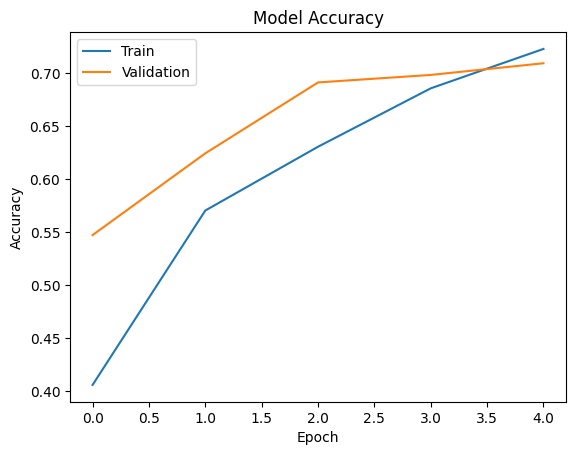

In [30]:
# plot the model's accuracy and loss over time
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

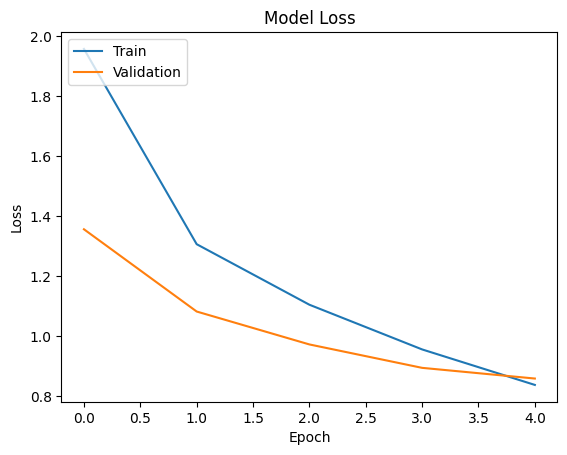

In [31]:
# plot the model's accuracy and loss over time
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

100/100 [==============================] - 7s 66ms/step


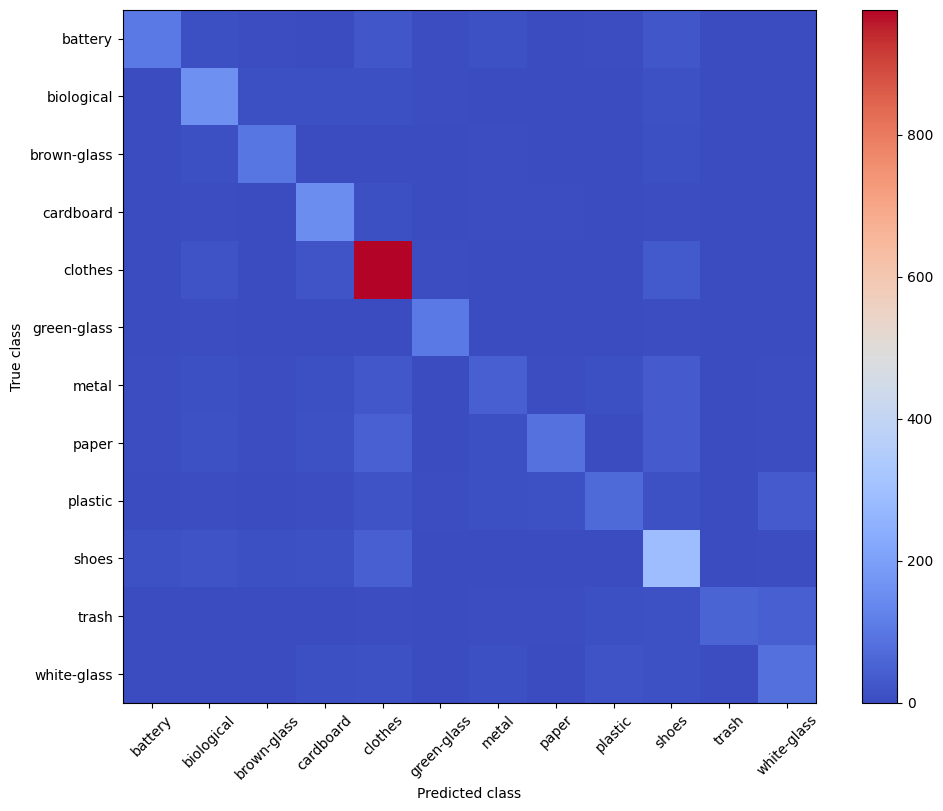

In [32]:
# from the above table we can see that the basic CNN model predicted over 70% of images correctly. This is a good start, but we can do better. I'm also going to plot a confusion matrix to see which classes the model is struggling with and then some performance metrics to get a better idea of how the model is performing.

# plot a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to label indexes
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 9))
plt.imshow(cm, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(12), le.classes_, rotation=45)
plt.yticks(range(12), le.classes_)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Compute the precision, recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=le.classes_)

print(report)

              precision    recall  f1-score   support

     battery       0.78      0.53      0.63       196
  biological       0.63      0.77      0.69       207
 brown-glass       0.72      0.77      0.74       124
   cardboard       0.64      0.81      0.71       187
     clothes       0.82      0.92      0.87      1057
 green-glass       0.82      0.83      0.82       128
       metal       0.41      0.27      0.32       168
       paper       0.70      0.39      0.50       222
     plastic       0.55      0.36      0.43       180
       shoes       0.59      0.73      0.65       401
       trash       0.82      0.39      0.53       145
 white-glass       0.46      0.52      0.49       159

    accuracy                           0.70      3174
   macro avg       0.66      0.61      0.62      3174
weighted avg       0.70      0.70      0.69      3174


In [34]:
# print the amount of images in each class in the test set
import numpy as np

unique, counts = np.unique(y_true_classes, return_counts=True)
dict(zip(le.classes_, counts))

{'battery': 196,
 'biological': 207,
 'brown-glass': 124,
 'cardboard': 187,
 'clothes': 1057,
 'green-glass': 128,
 'metal': 168,
 'paper': 222,
 'plastic': 180,
 'shoes': 401,
 'trash': 145,
 'white-glass': 159}

Task 2.1 Analyse and improve the base model
- data augmentation
- pipeline profiling
- hyperparameter tuning

In [57]:
# import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [58]:
# create a data generator object that transforms images
train_datagen = ImageDataGenerator(
    rotation_range=30,      # randomly rotate images in the range 0-30 degrees
    zoom_range=0.2,         # Randomly zoom image 20%
    width_shift_range=0.2,  # randomly shift images horizontally 20%
    height_shift_range=0.2, # randomly shift images vertically 20%
    shear_range=0.2,        # randomly shear images 20%
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=True,     # randomly flip images vertically
    fill_mode='nearest'     # fill mode nearest
)

In [59]:
# fit the data generator to the training data
train_datagen.fit(X_train)

In [61]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

# now we will profile the input pipeline to identify the most time-consuming operation and then take action to address that slow operation
# create a tensorboard callback
log_dir = "logs/fit"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=0, profile_batch='1, 2')

In [62]:
# wrap the model training in a function so we can profile it (this will use the augmented data as we have already updated the model)
def train_model():
    model.fit(train_datagen.flow(X_train, y_train, batch_size=128), epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

In [63]:
# profile the model training
# update the model to use the augmented data
train_model()

Epoch 1/5
100/100 [==============================] - 124s 1s/step - loss: 0.9957 - accuracy: 0.6718 - val_loss: 0.8168 - val_accuracy: 0.7284
Epoch 2/5
100/100 [==============================] - 122s 1s/step - loss: 0.9934 - accuracy: 0.6692 - val_loss: 0.8522 - val_accuracy: 0.7268
Epoch 3/5
100/100 [==============================] - 122s 1s/step - loss: 0.9626 - accuracy: 0.6857 - val_loss: 0.8165 - val_accuracy: 0.7205
Epoch 4/5
100/100 [==============================] - 121s 1s/step - loss: 0.9480 - accuracy: 0.6844 - val_loss: 0.9101 - val_accuracy: 0.6966
Epoch 5/5
100/100 [==============================] - 132s 1s/step - loss: 0.9422 - accuracy: 0.6866 - val_loss: 0.8365 - val_accuracy: 0.7287


In [64]:
# save the new model to a file
model.save("models/garbage_classifier_augmented.h5") # h5 is the extension for saving models in keras

In [65]:
# print the model's performance
test_loss, test_acc = model.evaluate(X_test, y_test)

100/100 [==============================] - 7s 68ms/step - loss: 0.8365 - accuracy: 0.7287


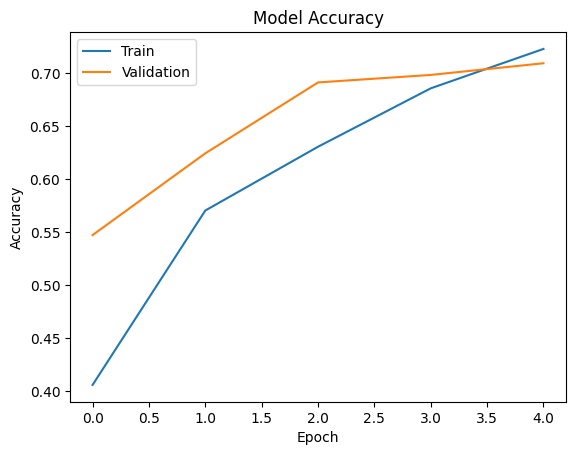

In [66]:
# plot the model's accuracy and loss over time
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

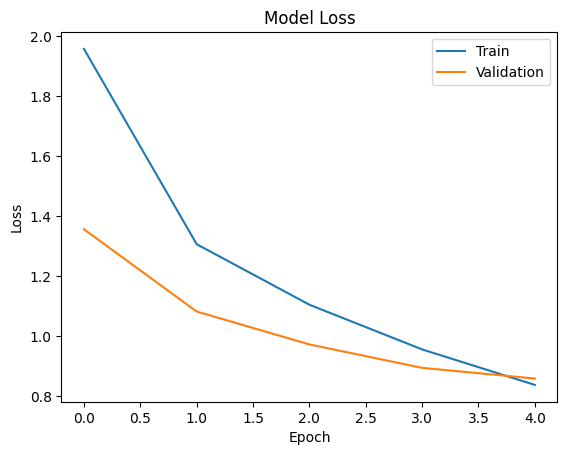

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [68]:
# load the tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [69]:
# reload tensorboard
%reload_ext tensorboard

In [70]:
# start tensorboard
%tensorboard --logdir logs/fit

Launching TensorBoard...

2.2 Compare performance under equal training time
- is it worth it?
- how much time is spent on data augmentation?
- how much time is spent on training?
- classification report

- The profiler shows that the longest time is spent on the "IteratorGetNext" operation which is the operation that gets the next batch of data from the dataset.
- We can address this by using the prefetch method to prefetch the next batch of data while the model is training on the current batch
this will reduce the time spent on the "IteratorGetNext" operation as the next batch of data will already be ready to go when the model is ready for it

In [74]:
# use prefetch now
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).prefetch(1) # prefetch 1 batch

In [75]:
# wrap the model training in a function so we can profile it (this will use the augmented data as we have already updated the model)
def train_model():
    model.fit(train_dataset, epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

In [76]:
train_model()

Epoch 1/5
199/199 [==============================] - 119s 596ms/step - loss: 0.7730 - accuracy: 0.7434 - val_loss: 0.7807 - val_accuracy: 0.7480
Epoch 2/5
199/199 [==============================] - 118s 593ms/step - loss: 0.6190 - accuracy: 0.7928 - val_loss: 0.7314 - val_accuracy: 0.7706
Epoch 3/5
199/199 [==============================] - 118s 592ms/step - loss: 0.5008 - accuracy: 0.8302 - val_loss: 0.7633 - val_accuracy: 0.7706
Epoch 4/5
199/199 [==============================] - 118s 593ms/step - loss: 0.3996 - accuracy: 0.8671 - val_loss: 0.8965 - val_accuracy: 0.7571
Epoch 5/5
199/199 [==============================] - 122s 615ms/step - loss: 0.3150 - accuracy: 0.8963 - val_loss: 0.9609 - val_accuracy: 0.7612


In [77]:
# save the new model to a file
model.save("models/garbage_classifier_augmented_prefetch.h5") # h5 is the extension for saving models in keras

2.3 Identify model strengths and weaknesses
- what images does it perform well on?
- what images does it perform poorly on?
- what classes does it perform well on?
- do they share any similarities?
- how can we improve the model?

From the results we can see that the model performs very well on certain classes such as clothes and cardboard but struggles heavily with others such as battery and metal.

Up until this point we have 3 models saved each with varying degrees of performance. It is still nowhere near perfect so now we can implement transfer learning to see if we can improve the performance significantly.
Here is a list of potential implementations to improve the performance:
- use a validation, test and train split of the data (currently only using train and test)
- use a different model architecture (currently using CNN)
- fine tune learning rate, batch size and other hyperparameters
- regularisation (dropout, L1/L2)
- data augmentation but adding in brightness, contrast, saturation, hue, etc.
- transfer learning such as VGG16, VGG19, ResNet50, InceptionV3, etc. (currently using a custom CNN but with not much success)

In [78]:
# load the VGG16 model but don't include the top (fully connected layers)
from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(X_train.shape[1:]))

In [79]:
# freeze all the layers in the base VGG16 model so they will *not* be updated during the training process
for layer in vgg16_model.layers:
    layer.trainable = False

In [80]:
from keras.layers import GlobalAveragePooling2D

# add a global spatial average pooling layer (this flattens the output of the VGG16 model into a single vector)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)

In [81]:
from keras.layers import Dense
x = Dense(512, activation='relu')(x) # add a fully-connected layer

In [82]:
# add a logistic layer (this is the output layer of the model)
predictions = Dense(12, activation='softmax')(x) # 12 classes in the dataset

In [83]:
# create the full network so we can train on it
from keras.models import Model
model = Model(inputs=vgg16_model.input, outputs=predictions) # this is the full model that we will train

In [84]:
# before compiling the model let's see ReduceLROnPlateau in action (this will reduce the learning rate when the validation loss has stopped improving)
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [85]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
# train the model and include the ReduceLROnPlateau callback to reduce the learning rate when the validation loss has stopped improving
history = model.fit(train_dataset, epochs=5, batch_size = 64, validation_data=(X_test, y_test), callbacks=[tensorboard_callback, reduce_lr])

Epoch 1/5
199/199 [==============================] - 395s 2s/step - loss: 0.9051 - accuracy: 0.7219 - val_loss: 0.6403 - val_accuracy: 0.8034 - lr: 0.0010
Epoch 2/5
199/199 [==============================] - 376s 2s/step - loss: 0.5489 - accuracy: 0.8246 - val_loss: 0.5388 - val_accuracy: 0.8299 - lr: 0.0010
Epoch 3/5
199/199 [==============================] - 375s 2s/step - loss: 0.4680 - accuracy: 0.8491 - val_loss: 0.5059 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 4/5
199/199 [==============================] - 375s 2s/step - loss: 0.4200 - accuracy: 0.8652 - val_loss: 0.4890 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 5/5
199/199 [==============================] - 391s 2s/step - loss: 0.3844 - accuracy: 0.8775 - val_loss: 0.4791 - val_accuracy: 0.8450 - lr: 0.0010


In [87]:
# save the new model to a file
model.save("models/garbage_classifier_vgg16.h5")

We can see that the model is performing much better than the previous models. The validation accuracy is now over 80% which is a significant improvement and apporaching 90%+. Obviously we have 12 classes so it is not as easy as a simpler dataset with only 2 classes due to the variety of images in the dataset. We can also see that the validation loss is still decreasing so we can train for more epochs to see if we can improve the performance even further but my computer currently does not have the resources to do so as I'm using a CPU instead of a GPU.

In [88]:
# lets evaluate the most recent model
test_loss, test_acc = model.evaluate(X_test, y_test)

100/100 [==============================] - 89s 886ms/step - loss: 0.4791 - accuracy: 0.8450


In [89]:
# show the precision, recall, f1 and AUC scores for the most recent model (this is the model with the best performance)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))

100/100 [==============================] - 88s 871ms/step
              precision    recall  f1-score   support

     battery       0.89      0.83      0.86       196
  biological       0.99      0.80      0.89       207
 brown-glass       0.83      0.73      0.78       124
   cardboard       0.81      0.68      0.74       187
     clothes       0.95      0.96      0.96      1057
 green-glass       0.81      0.86      0.84       128
       metal       0.72      0.68      0.70       168
       paper       0.66      0.86      0.75       222
     plastic       0.54      0.74      0.63       180
       shoes       0.84      0.95      0.89       401
       trash       0.98      0.69      0.81       145
 white-glass       0.87      0.58      0.69       159

    accuracy                           0.84      3174
   macro avg       0.82      0.78      0.79      3174
weighted avg       0.86      0.84      0.85      3174


Now I will use the model to predict on some newer images and see how it performs on unseen data (if it performs well this means that it generalises well)

Task 3
- improve model generalisation across all domains
- collect new images from the internet
- predict on the new images
- evaluate the model performance on the new images
- improve the model if necessary

In [91]:
from keras.models import load_model
# load the best performing model which is the vgg16 one
best_model = load_model("models/garbage_classifier_vgg16.h5")

In [92]:
from keras.preprocessing import image
import numpy as np

# Load the image
img = image.image_utils.load_img('samples_images/batterySample.jpg', target_size=(150, 150))

# Convert the image to a numpy array
img_array = image.image_utils.img_to_array(img)

# Expand dimensions to fit the model's expected input format
img_array = np.expand_dims(img_array, axis=0)

# Scale the image pixel values
img_array /= 255.0 # this is the same as img_array = img_array / 255.0

In [93]:
# predict the class of the image
prediction = best_model.predict(img_array) # this returns a numpy array with the probabilities for each class (e.g. [0.1, 0.2, 0.7])

1/1 [==============================] - 0s 171ms/step


In [96]:
# print the prediction
print(prediction)

[[9.0665972e-01 8.7792614e-07 1.1416726e-03 2.4765253e-03 4.0166526e-07
  1.2495930e-03 4.2571273e-02 1.6129050e-02 2.6050339e-02 2.8574934e-06
  1.1540600e-05 3.7061328e-03]]


In [97]:
# get the class with the highest probability
predicted_class = np.argmax(prediction)

In [98]:
# print the predicted class
print(predicted_class)

0


In [99]:
# get the class name of the predicted class
predicted_class_name = le.classes_[predicted_class]

In [100]:
# print the predicted class name
print(predicted_class_name)

battery


In [101]:
# let's try another image which is a cardboard box
img = image.image_utils.load_img('samples_images/cardboardSample.jpg', target_size=(150, 150))

# Convert the image to a numpy array
img_array = image.image_utils.img_to_array(img)

# Expand dimensions to fit the model's expected input format
img_array = np.expand_dims(img_array, axis=0)

# Scale the image pixel values
img_array /= 255.0

In [102]:
# predict the class of the image
prediction = best_model.predict(img_array)

1/1 [==============================] - 0s 57ms/step


In [103]:
# print the prediction
print(prediction)

[[1.8361866e-02 3.0531294e-06 2.1753619e-04 9.7859186e-01 6.4490482e-06
  1.8139352e-05 2.5762527e-03 2.0415043e-04 6.8558952e-06 1.5070719e-06
  2.4232647e-06 9.8068585e-06]]


In [104]:
# get the class with the highest probability
predicted_class = np.argmax(prediction)

In [105]:
# print the predicted class
print(predicted_class)

3


In [106]:
# get the class name of the predicted class
predicted_class_name = le.classes_[predicted_class]

In [107]:
# print the predicted class name
print(predicted_class_name)

cardboard


We can see that the model is performing well on unseen data. It correctly predicted the class of the battery and the cardboard box. I am very please with this so far but of course we can always improve the model further.

In [108]:
# show the images that we used
import matplotlib.pyplot as plt

In [109]:
# load the image
img = image.image_utils.load_img('samples_images/batterySample.jpg', target_size=(150, 150))

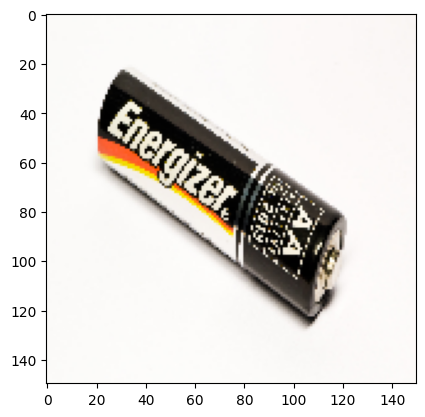

In [110]:
# show the image
plt.imshow(img)

In [111]:
# load the other image
img = image.image_utils.load_img('samples_images/cardboardSample.jpg', target_size=(150, 150))

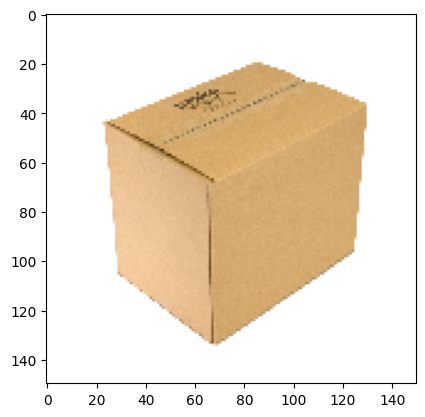

In [112]:
# show the image
plt.imshow(img)

Task 4
- build a workable prototype

I used python/flask to build the website and all source code is included. The user can upload an image of their choice and it will be fed to the model that we trained above and give a prediction based on what type of item it is. It is a very simple yet intuitive interface that helps target users use the model without having to know anything about machine learning or coding.